# readme
descrip: plot temp and salt contours overlapped with sfc vel quiver in Gulf of Maine and Gulf of Mexico for historic time period <br>

update history: <br>
v1.0 DL 2021Feb06 <br>
v1.1 DL 2021Mar03 <br>
v1.2 DL 2021Apr24 <br>
v1.3 DL 2021May06 make publication-ready pics <br>
v1.4 DL 2021May20 combine TR run results into one fig (for main text) and control run results into one fig (support info) <br>
v1.5 DL 2021Jun02 pivot to CESM-HR special volume paper, use TR minus CN to account for the model drift <br>
 
extra notes: <br>
Fig 3 of the CESM-HR specital volume paper <br>

# import modules

In [1]:
# general python packages
import numpy as np
# from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
# import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.1.162:41644")
client

Client Scheduler: tcp://10.73.1.162:41644 Dashboard: http://10.73.1.162:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define parameters

In [3]:
# lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, nlat and nlon ranges are slightly larger than lat and lon ranges. 
# lon1, lon2 = -100, -45
# lat1, lat2 = 10, 60

nlon1_NA_t12, nlon2_NA_t12 = 50, 800
nlat1_NA_t12, nlat2_NA_t12 = 1200, 2100

nlon1_NA_g16, nlon2_NA_g16 = 260, 321
nlat1_NA_g16, nlat2_NA_g16 = 200, 370

chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

# === Gulf of Maine (GMa) ===
lat1_GMa, lat2_GMa = 35, 55
lon1_GMa, lon2_GMa = -75, -50 # GMa: Gulf of Maine
# ===========================

# === Gulf of Mexico (GMe) ===
lat1_GMe, lat2_GMe = 15, 32
lon1_GMe, lon2_GMe = -100, -75 # GMe: Gulf of Mexico
# ============================

# === POP grids files ===
infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# =======================

outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'TScontourSfcVelHistGulfMaine_2021Jun18.png'
pic2 = outdir + 'TScontourSfcVelHistGulfMexico_2021Jun18.png'

# read data files

read vel files

In [4]:
#TH: transient HR
infile1_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1979-2020_UVVEL_2021Apr29/'              
    'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1979-2020_UVVEL_2021Jul02.nc')

ds1_vel_TH = xr.open_dataset(infile1_vel_TH, chunks=chunks_HR)
ds1_vel_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 42, z_t: 14)
Coordinates:
  * time        (time) object 1979-07-16 21:59:59.999997 ... 2020-07-16 21:59...
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 1.25e+04 1.35e+04
    ULONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(42, 2), meta=np.ndarray>
    UVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 14, 400, 300), meta=np.ndarray>
    VVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 14, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       Fri Jul  2 10:09:19 2021: ncrcat -F -d z_t,1,14,1 B.E.13.B...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-02-23 at 06:04:24.1
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  29400371
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [5]:
#TH: transient HR
infile1_TS_TH = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/TS/'
                 'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.TEMP_SALT_2005-2017_2021Jul03/'
                 'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.2005-2017_TEMP_SALT_2021Jul03.nc')

ds1_TS_TH = xr.open_dataset(infile1_TS_TH, chunks=chunks_HR)
ds1_TS_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 13, z_t: 14)
Coordinates:
  * time        (time) object 2005-07-16 21:59:59.999997 ... 2017-07-16 21:59...
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 1.25e+04 1.35e+04
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(13, 2), meta=np.ndarray>
    TEMP        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(13, 14, 400, 300), meta=np.ndarray>
    SALT        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(13, 14, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       Sat Jul  3 21:59:32 2021: ncrcat B.E.13.BHISTC5.ne120_t12....
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-03-19 at 16:42:58.0
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  35322131
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [6]:
# TL: transient LR
infile1_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
                  'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway1979-2020/'
    'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1979-2020_UVVEL_2021July02.nc')

ds1_vel_TL = xr.open_dataset(infile1_vel_TL, chunks=chunks_HR)
ds1_vel_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 42, z_t: 60)
Coordinates:
  * time        (time) object 1979-07-16 21:59:59.999997 ... 2020-07-16 21:59...
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG       (nlat, nlon) float64 dask.array<chunksize=(384, 300), meta=np.ndarray>
    ULAT        (nlat, nlon) float64 dask.array<chunksize=(384, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(42, 2), meta=np.ndarray>
    UVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 60, 384, 300), meta=np.ndarray>
    VVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 60, 384, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       Fri Jul  2 10:20:16 2021: ncrcat B.E.13.BHISTC5.ne30g16.se...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-27 at 02:28:24.2
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  1177875
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [7]:
infile1_TS_TL = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/TS/'
                 'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.TEMP_SALT_2005-2017_2021Jul03/'
                 'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.2005-2017_TEMP_SALT_2021Jul03.nc')

ds1_TS_TL = xr.open_dataset(infile1_TS_TL, chunks=chunks_LR)
ds1_TS_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 13, z_t: 14)
Coordinates:
  * time        (time) object 2005-07-16 21:59:59.999997 ... 2017-07-16 21:59...
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 1.25e+04 1.35e+04
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(13, 2), meta=np.ndarray>
    TEMP        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(13, 14, 384, 320), meta=np.ndarray>
    SALT        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(13, 14, 384, 320), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       Sat Jul  3 22:17:49 2021: ncrcat B.E.13.BHISTC5.ne30g16.se...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-30 at 00:24:54.2
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  1415125
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [8]:
ds_t12 = xr.open_dataset(infile_t12)
# ds_t12
ds_g16 = xr.open_dataset(infile_g16)
# ds_g16

ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))

In [9]:
infile0_TL = ('/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/'
        'ocn/monthly/cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_TL = xr.open_dataset(infile0_TL,chunks=chunks_LR)

infile0_TH = ('/ihesp/archive/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/'
              'ocn/monthly/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_TH = xr.open_dataset(infile0_TH, chunks=chunks_HR)

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 720, lon: 1440, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 726.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

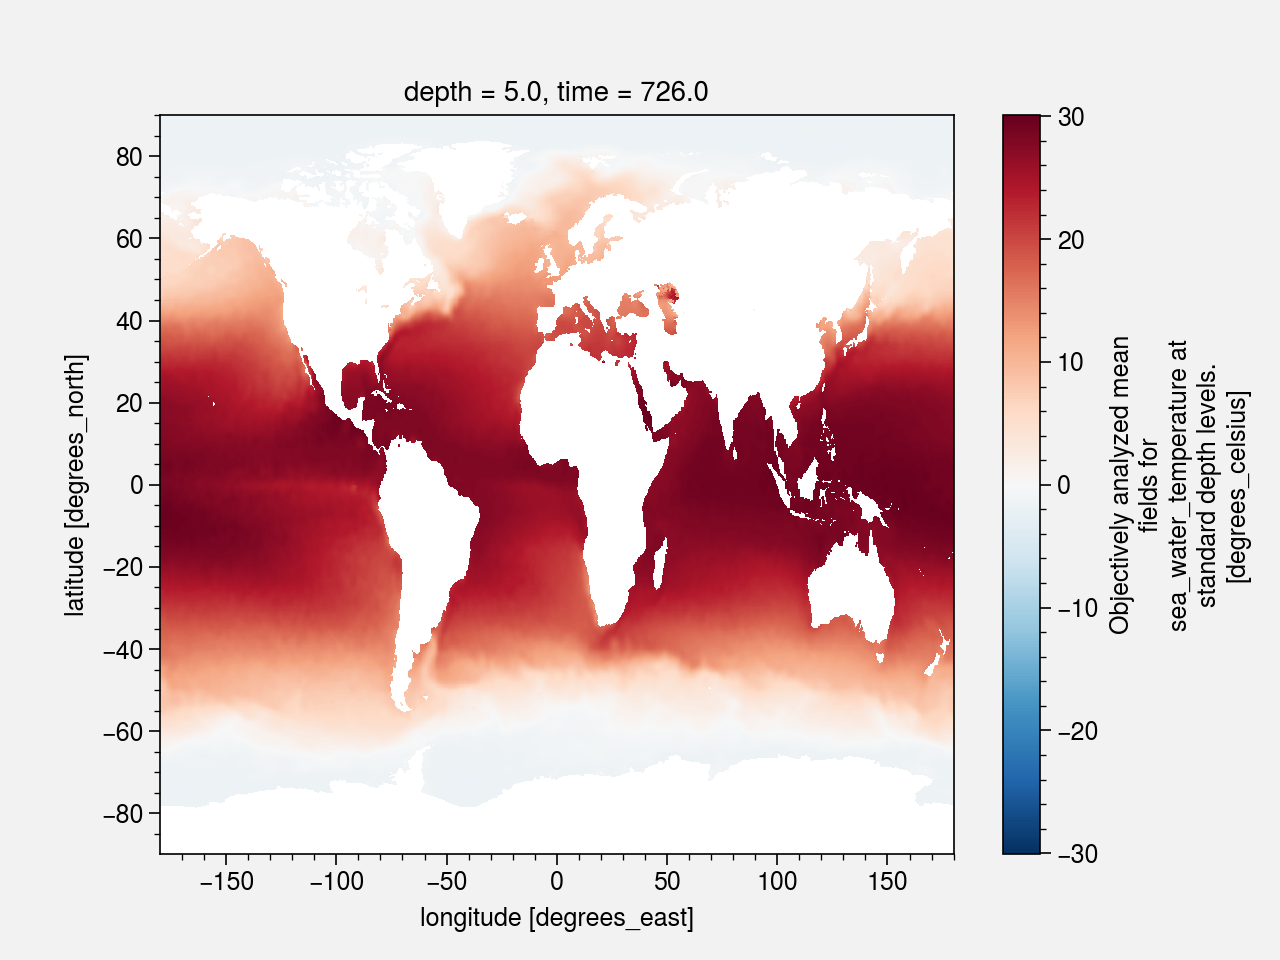

In [10]:
infile_Tobs = '/ihesp/user/dapengli/obs_dat/WOA_2021Jun18/WOA2018/woa18_A5B7_t00_04.nc'
ds_Tobs = xr.open_dataset(infile_Tobs, decode_times=False)
ds_Tobs.t_an.isel(time=0).sel(depth=5).plot()
ds_Tobs

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 720, lon: 1440, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 726.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_an                (time, depth, lat, lon) float32 ...
    s_mn                (time, depth, lat, lon) float32 ...
    s_dd                (time, depth, lat, lon) float64 ...
    s_sd                (time, depth, lat, lon) float32 ...
    s_se                (time, depth, lat, lon) float32 ...
    s_oa                (time, depth, lat, lon) float32 ...
    s_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

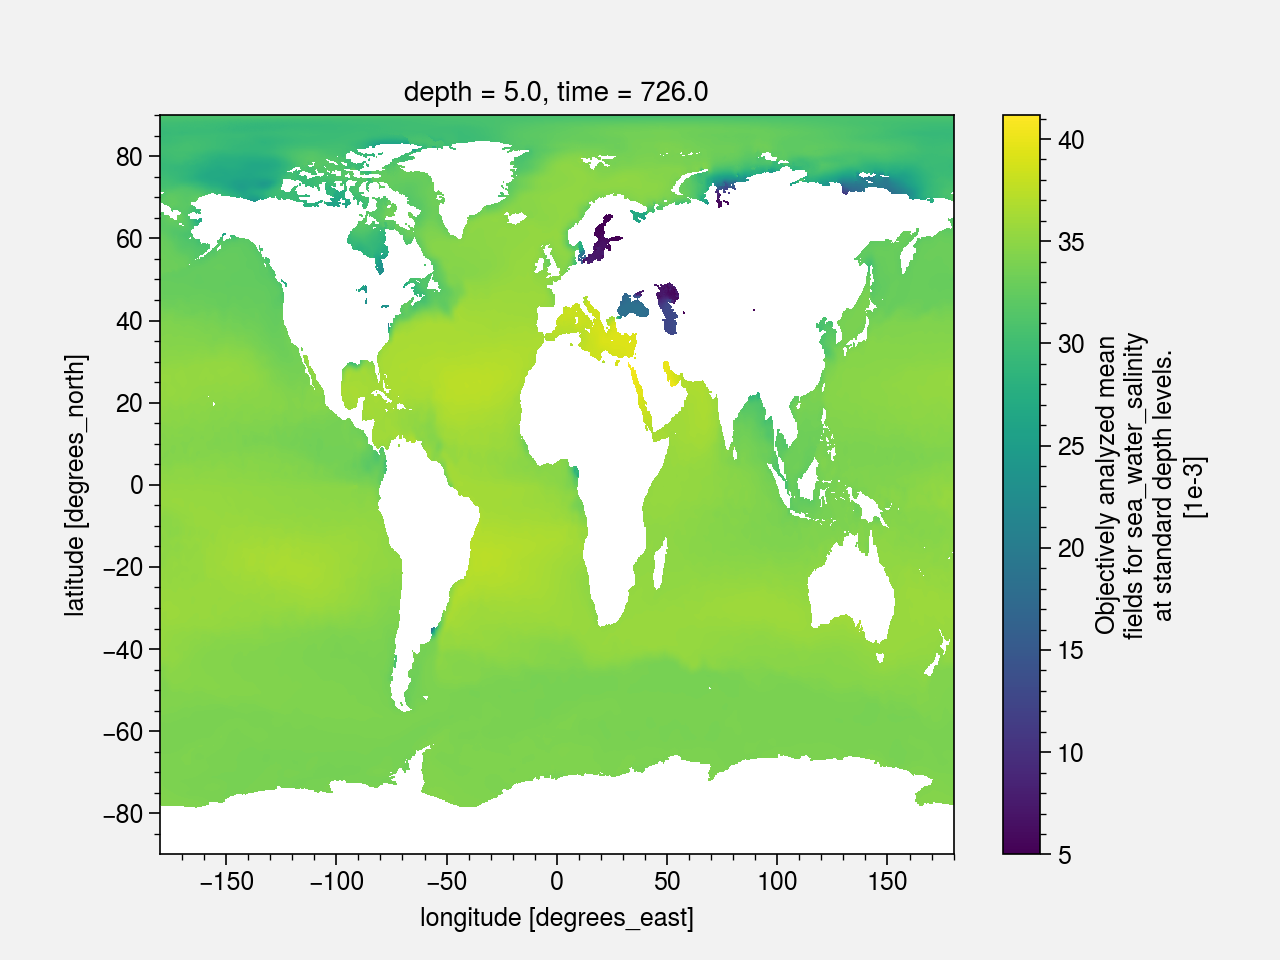

In [11]:
infile_Sobs = '/ihesp/user/dapengli/obs_dat/WOA_2021Jun18/WOA2018/woa18_A5B7_s00_04.nc'
ds_Sobs = xr.open_dataset(infile_Sobs, decode_times=False)
ds_Sobs.s_an.isel(time=0).sel(depth=5).plot()
ds_Sobs

# data analysis 

In [12]:
u1_NA_TH = ds1_vel_TH.UVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                                nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).sel(
                                time=slice('2005','2017')).mean('time')
v1_NA_TH = ds1_vel_TH.VVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                                nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).sel(
                                time=slice('2005','2017')).mean('time')
temp1_NA_TH = ds1_TS_TH.TEMP.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                                  nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).sel(
                                time=slice('2005','2017')).mean('time')
salt1_NA_TH = ds1_TS_TH.SALT.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                                  nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).sel(
                                time=slice('2005','2017')).mean('time')
# u2_NA_TH = ds_vel2_TH.UVEL.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute() 
# v2_NA_TH = ds_vel2_TH.VVEL.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute() 

u1_NA_TL = ds1_vel_TL.UVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                                nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).sel(
                                time=slice('2005','2017')).mean('time')
v1_NA_TL = ds1_vel_TL.VVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                                nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).sel(
                                time=slice('2005','2017')).mean('time')
temp1_NA_TL = ds1_TS_TL.TEMP.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                                  nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).sel(
                                time=slice('2005','2017')).mean('time')
salt1_NA_TL = ds1_TS_TL.SALT.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                                  nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).sel(
                                time=slice('2005','2017')).mean('time')
# u2_NA_TL = ds_vel2_TL.UVEL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute() 
# v2_NA_TL = ds_vel2_TL.VVEL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute() 

u1_NA_TH

<xarray.DataArray 'UVEL' (z_t: 14, nlat: 900, nlon: 750)>
dask.array<mean_agg-aggregate, shape=(14, 900, 750), dtype=float32, chunksize=(14, 400, 300), chunktype=numpy.ndarray>
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 1.15e+04 1.25e+04 1.35e+04
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 250), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 250), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [13]:
# ds0_TL.ANGLE.plot()
angle_NA_TL = ds0_TL.ANGLE.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                                nlat=slice(nlat1_NA_g16, nlat2_NA_g16)) # [rad]
angle_NA_TH = ds0_TH.ANGLE.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                                nlat=slice(nlat1_NA_t12, nlat2_NA_t12)) # [rad]

In [14]:
u1r_NA_TL = np.cos(angle_NA_TL)*u1_NA_TL - np.sin(angle_NA_TL)*v1_NA_TL 
v1r_NA_TL = np.sin(angle_NA_TL)*u1_NA_TL + np.cos(angle_NA_TL)*v1_NA_TL 

# u2r_NA_TL = np.cos(angle_NA_TL)*u2_NA_TL - np.sin(angle_NA_TL)*v2_NA_TL 
# v2r_NA_TL = np.sin(angle_NA_TL)*u2_NA_TL + np.cos(angle_NA_TL)*v2_NA_TL 

u1r_NA_TH = np.cos(angle_NA_TH)*u1_NA_TH - np.sin(angle_NA_TH)*v1_NA_TH 
v1r_NA_TH = np.sin(angle_NA_TH)*u1_NA_TH + np.cos(angle_NA_TH)*v1_NA_TH 

# u2r_NA_TH = np.cos(angle_NA_TH)*u2_NA_TH - np.sin(angle_NA_TH)*v2_NA_TH 
# v2r_NA_TH = np.sin(angle_NA_TH)*u2_NA_TH + np.cos(angle_NA_TH)*v2_NA_TH 
u1r_NA_TH

<xarray.DataArray (nlat: 900, nlon: 750, z_t: 14)>
dask.array<sub, shape=(900, 750, 14), dtype=float64, chunksize=(400, 300, 14), chunktype=numpy.ndarray>
Coordinates:
    ULONG    (nlat, nlon) float64 -104.9 -104.8 -104.7 -104.6 ... -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 1.9 1.9 1.9 1.9 1.9 ... -1.0 -1.0 -1.0 -1.0
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 250), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 250), meta=np.ndarray>
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 1.15e+04 1.25e+04 1.35e+04
Dimensions without coordinates: nlat, nlon

In [15]:
# Ma: Gulf of maine, mask GS for Gulf of Maine circulation plot
u1_Ma_TH = u1r_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').compute()
v1_Ma_TH = v1r_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').compute()

temp1_Ma_TH = temp1_NA_TH.sel(z_t=5*100, method='nearest').compute()
salt1_Ma_TH = salt1_NA_TH.sel(z_t=5*100, method='nearest').compute()

u1_Ma_TL = u1r_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').compute()
v1_Ma_TL = v1r_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').compute()

temp1_Ma_TL = temp1_NA_TL.sel(z_t=5*100, method='nearest').compute()
salt1_Ma_TL = salt1_NA_TL.sel(z_t=5*100, method='nearest').compute()

salt_Ma_obs = ds_Sobs.s_an.isel(time=0).sel(depth=5, method='nearest')
temp_Ma_obs = ds_Tobs.t_an.isel(time=0).sel(depth=5, method='nearest')

In [16]:
# Me: Gulf of Mexico,
u1_Me_TH = u1r_NA_TH.sel(z_t=5*100, method='nearest').compute()
v1_Me_TH = v1r_NA_TH.sel(z_t=5*100, method='nearest').compute()

temp1_Me_TH = temp1_NA_TH.sel(z_t=5*100, method='nearest').compute()
salt1_Me_TH = salt1_NA_TH.sel(z_t=5*100, method='nearest').compute()

u1_Me_TL = u1r_NA_TL.sel(z_t=5*100, method='nearest').compute()
v1_Me_TL = v1r_NA_TL.sel(z_t=5*100, method='nearest').compute()

temp1_Me_TL = temp1_NA_TL.sel(z_t=5*100, method='nearest').compute()
salt1_Me_TL = salt1_NA_TL.sel(z_t=5*100, method='nearest').compute()

salt_Me_obs = ds_Sobs.s_an.isel(time=0).sel(depth=5, method='nearest')
temp_Me_obs = ds_Tobs.t_an.isel(time=0).sel(depth=5, method='nearest')

# make pics

Gulf of Maine

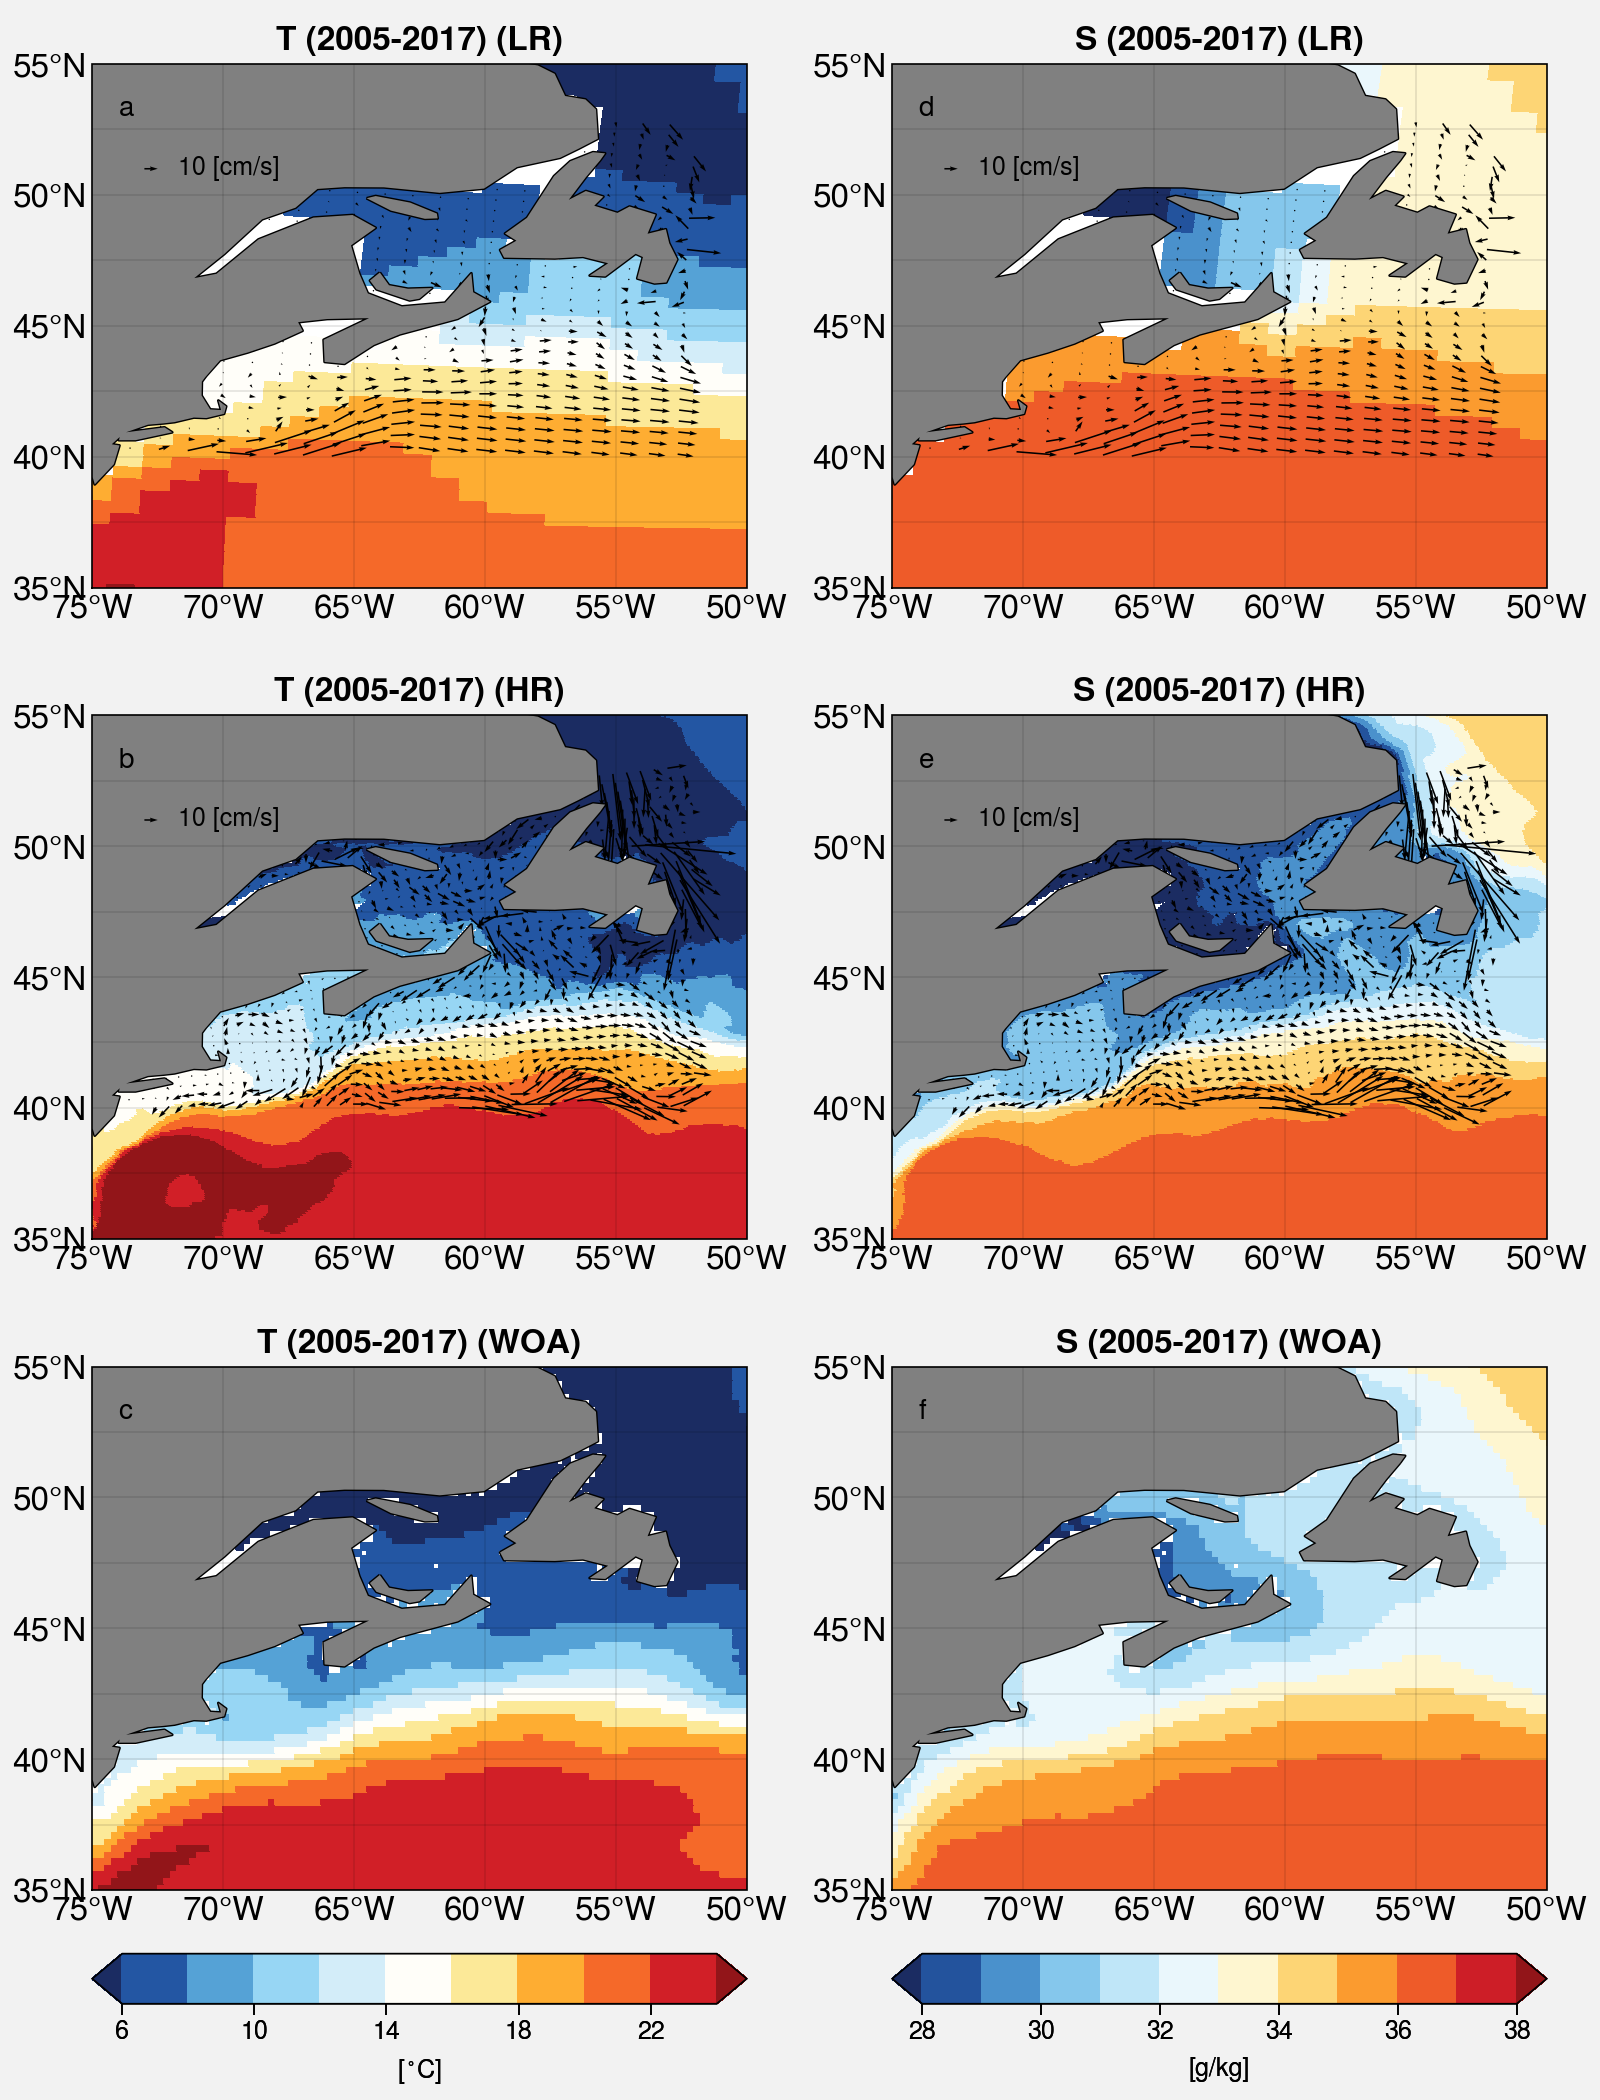

In [17]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='10.5in')

m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        temp1_Ma_TL,  levels=np.arange(6,24+1,2), transform=pc, 
         cmap="ColdHot", extend='both')
q00 = axs[0,0].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, u1_Ma_TL, v1_Ma_TL, 
                      transform=pc, scale=150, scale_units='inches')
axs[0,0].quiverkey(q00, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('T (2005-2017) (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-74, 53, 'a', transform=pc, fontsize=10)
# cb = axs[0,0].colorbar(m00,loc='r',label='[C]',width='2em',shrink=1)

m01=axs[0,1].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        salt1_Ma_TL, levels=np.arange(28,38+1,1), transform=pc, 
        cmap="ColdHot", extend='both')
q01 = axs[0,1].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u1_Ma_TL, v1_Ma_TL, transform=pc, 
                      scale=150, scale_units='inches')
axs[0,1].quiverkey(q01, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('S (2005-2017) (LR)', fontsize=12, fontweight='bold')
axs[0,1].text(-74, 53, 'd', transform=pc, fontsize=10)


m10=axs[1,0].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        temp1_Ma_TH,  levels=np.arange(6,24+1,2), transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
q10 = axs[1,0].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                u1_Ma_TH[::5,::5], v1_Ma_TH[::5, ::5], transform=pc, scale=150,scale_units='inches')
axs[1,0].quiverkey(q10, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('T (2005-2017) (HR)', fontsize=12, fontweight='bold')
axs[1,0].text(-74, 53, 'b', transform=pc, fontsize=10)
# cb = axs[1,0].colorbar(m10,loc='b',label='[C]',width='2em',shrink=1)

m11=axs[1,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        salt1_Ma_TH, levels=np.arange(28,38+1,1),  transform=pc, 
         cmap="ColdHot", extend='both')
q11 = axs[1,1].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                u1_Ma_TH[::5,::5], v1_Ma_TH[::5, ::5], transform=pc, scale=150,scale_units='inches')
axs[1,1].quiverkey(q11, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('S (2005-2017) (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-74, 53, 'e', transform=pc, fontsize=10)

m20=axs[2,0].pcolormesh(ds_Tobs.lon, ds_Tobs.lat, 
        temp_Ma_obs, levels=np.arange(6,24+1,2),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('T (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,0].text(-74, 53, 'c', transform=pc, fontsize=10)
cb = axs[2,0].colorbar(m20,loc='b',label='[$^\circ$C]',width='2em',shrink=1)

m21=axs[2,1].pcolormesh(ds_Tobs.lon, ds_Tobs.lat, 
        salt_Ma_obs, levels=np.arange(28,38+1,1),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('S (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,1].text(-74, 53, 'f', transform=pc, fontsize=10)
cb = axs[2,1].colorbar(m21,loc='b',label='[g/kg]',width='2em',shrink=1)

fig1.savefig(pic1, bbox_inches='tight')

Gulf of Mexico

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


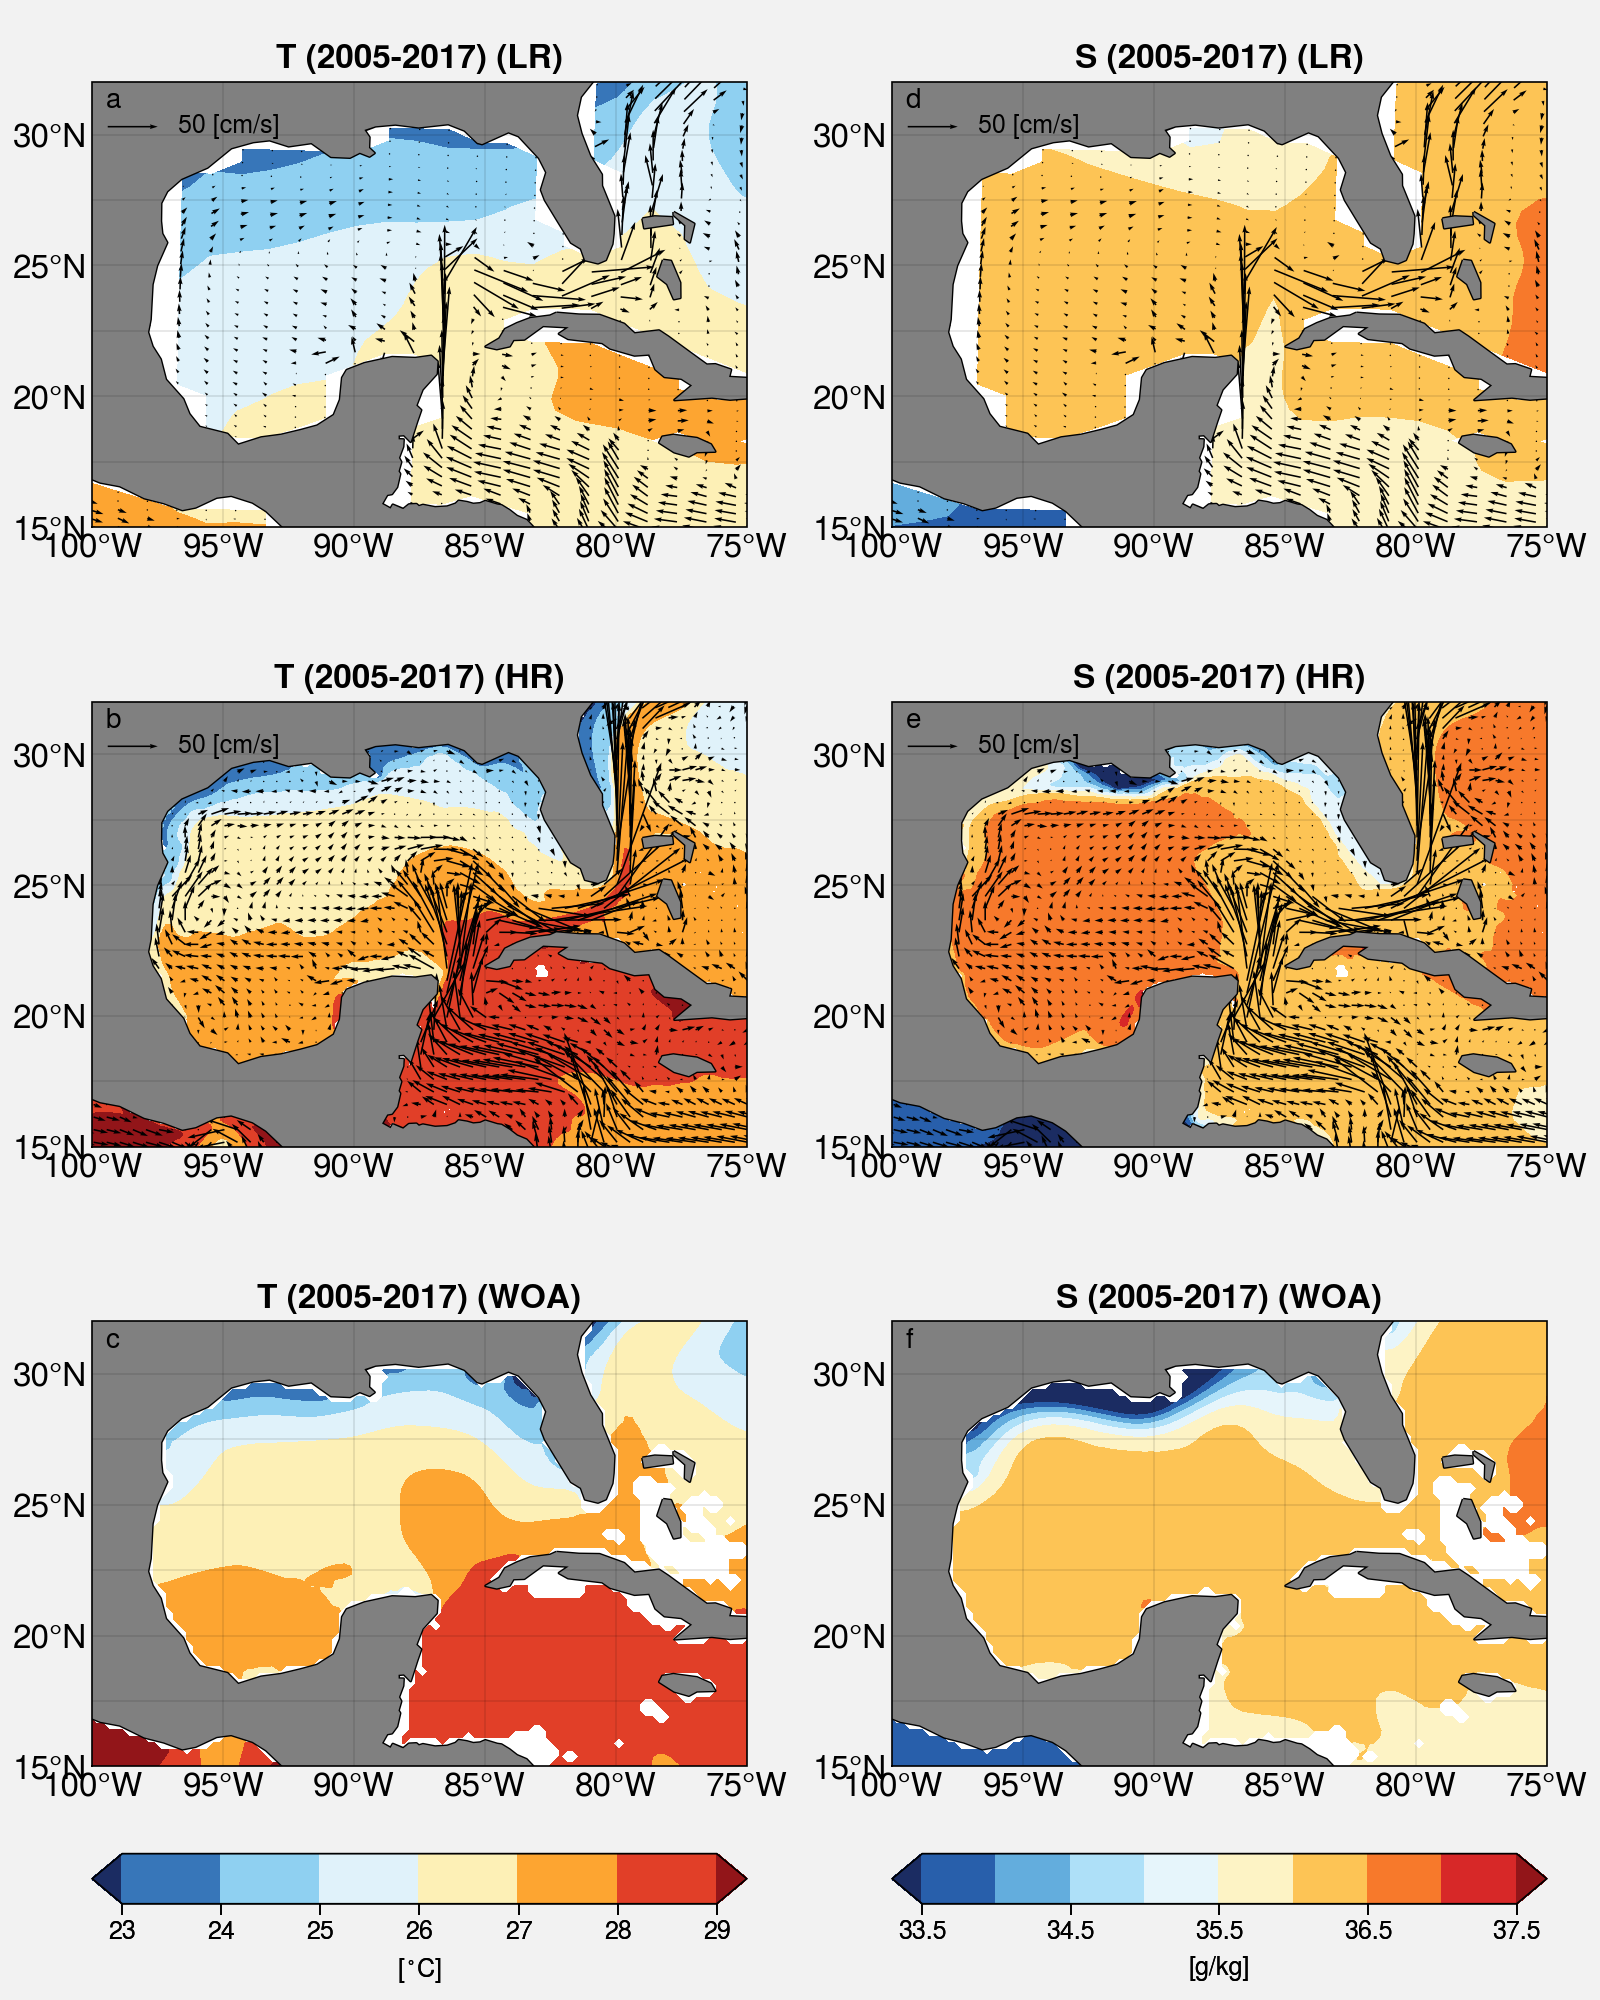

In [18]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig2, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='10in')

m00=axs[0,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        temp1_Me_TL,  levels=np.arange(23,29+1,1), transform=pc, 
        cmap="ColdHot", extend='both')
q00 = axs[0,0].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u1_Me_TL, v1_Me_TL, 
                      transform=pc, scale=200, scale_units='inches')
axs[0,0].quiverkey(q00, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('T (2005-2017) (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-99.5, 31, 'a', transform=pc, fontsize=10)

m01=axs[0,1].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        salt1_Me_TL,  levels=np.arange(33.5,37.51,0.5), transform=pc, 
        cmap="ColdHot", extend='both')
q01 = axs[0,1].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u1_Me_TL, v1_Me_TL, 
                      transform=pc, scale=200, scale_units='inches')
axs[0,1].quiverkey(q01, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('S (2005-2017) (LR)', fontsize=12, fontweight='bold')
axs[0,1].text(-99.5, 31, 'd', transform=pc, fontsize=10)


m10=axs[1,0].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        temp1_Me_TH,  levels=np.arange(23,29+1,1), transform=pc, 
        cmap="ColdHot", extend='both')
q10 = axs[1,0].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                      u1_Me_TH[::5,::5], v1_Me_TH[::5,::5], 
                      transform=pc, scale=200, scale_units='inches')
axs[1,0].quiverkey(q10, X=0.1, Y=0.9, U=50, label='50 [cm/s]', labelpos='E')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('T (2005-2017) (HR)', fontsize=12, fontweight='bold')
axs[1,0].text(-99.5, 31, 'b', transform=pc, fontsize=10)

m11=axs[1,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
         salt1_Me_TH,  levels=np.arange(33.5,37.51,0.5), transform=pc, 
         cmap="ColdHot", extend='both')
q11 = axs[1,1].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                      u1_Me_TH[::5,::5], v1_Me_TH[::5,::5], 
                      transform=pc, scale=200, scale_units='inches')
axs[1,1].quiverkey(q11, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('S (2005-2017) (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-99.5, 31, 'e', transform=pc, fontsize=10)


m20=axs[2,0].contourf(ds_Tobs.lon, ds_Tobs.lat, 
        temp_Me_obs, levels=np.arange(23,29+1,1),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('T (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,0].text(-99.5, 31, 'c', transform=pc, fontsize=10)
cb = axs[2,0].colorbar(m20,loc='b',label='[$^\circ$C]',width='2em',shrink=1)

m21=axs[2,1].contourf(ds_Sobs.lon, ds_Sobs.lat, 
        salt_Me_obs, levels=np.arange(33.5,37.51,0.5),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('S (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,1].text(-99.5, 31, 'f', transform=pc, fontsize=10)
cb = axs[2,1].colorbar(m21,loc='b',label='[g/kg]',width='2em',shrink=1)

fig2.savefig(pic2, bbox_inches='tight')